# Mouvement retrograde de Mars

## 1. Approche et description du problème  
On cherche établir un modèle qui décrive la longitude de Mars dapuis la terre (dans le référentiel géocentrique) en fonction du temps, on notera la notera $\phi_{M/T}(t)$ et d'ajuster ce modèle aux données proposés dans le fichier `DataMars.csv`.

> ***Données***  
>Rayon de l'orbite de la Terre :$R_{Terre} = 1$ *UA*  
>Période de révolution de la Terre : $T_{Terre}= 365.256$ *jours*  
>Rayon de l'orbite de Mars : $R_{Mars}= 1.52371$ *UA*  
>Période de révolution de Mars : $T_{Mars} = 686.885$ *jours*

>***Hypothèses***
>- On considère le référentiel heliocentrique comme galiléen pendant la durée considérée.
>- On considèrera le mouvement des deux planètes comme circulaire uniforme et contenu dans le plan de l'écliptique.

### Équations du mouvement

On rappelle les équations du mouvement d'un corps  en mouvement circulaire uniforme:

$$\begin{cases}
X(t)=Rcos(\omega t+\phi) \\ Y(t)=Rsin(\omega t+\phi)
\end{cases}$$  
avec $\omega = \frac{2\pi}{T}$ 

L'angle dans lequel se situe l'objet à $t=0$ correspond à la phase (à l'origine) $\phi$  

La position en coordonnées cartésiennes correspondante serait:
$$\begin{cases}
X(0)=Rcos(\phi)\\  
Y(0)=Rsin(\phi) 
\end{cases}$$  

### Démarche

Afin de calculer $\phi_{M/T}(t)$, il sera nécessaire de déterminer la position en cartésiennes de Mars par rapport à la Terre: $X_{Mars/Terre}$,$Y_{Mars/Terre}$
Les données dont on dispose sont donnés dans le référentiel heliocentrique. Il faudra donc faire un *changement de référentiel*, on appliquera la transformation de Galilée.  

1) A partir des données disponibles on peut bien déterminer la position/équations du mouvement tant de Mars comme de la Terre par rapport au Soleil: 

$$\begin{cases}
X_{Terre}(t)=R_{Terre}cos(\omega_{Terre} t +\phi) \\ Y_{Terre}(t)=R_{Terre}sin(\omega_{Terre} t +\phi)
\end{cases}$$  

$$\begin{cases}
X_{Mars}(t)=R_{Mars}cos(\omega_{Mars} t +\phi) \\ Y_{Mars}(t)=R_{Mars}sin(\omega_{Mars} t +\phi)
\end{cases}$$ 

2) Considérant le référentiel héliocentique comme galiléen on peut appliquer la tranformation de Galilée: 

$$\begin{cases}
    X_{Mars/Terre}(t)=X_{Mars/Soleil}(t)+X_{Soleil/Terre}(t)=X_{Mars/Soleil}(t)-X_{Terre/Soleil}(t)\\
    Y_{Mars/Terre}(t)=Y_{Mars/Soleil}(t)-Y_{Terre/Soleil}(t)
\end{cases}
$$  

3) Egalement on peut exprimer les équations du mouvement de Mars/Terre: 

$$\begin{cases}
X_{Mars/Terre}(t)=R_{Mars/Terre}cos(\omega_{Mars/Terre} t +\phi_{app0}) \\ Y_{Mars/Terre}(t)=R_{Mars/Terre}sin(\omega_{Mars/Terre} t +\phi_{app0})
\end{cases}$$  

4) On peut en déduire:  
$$\frac{Y_{M/T}}{X_{M/T}}=\frac{sin(\omega_{M/T} t +\phi_{app0})}{cos(\omega_{M/} t +\phi_{app0})}=tan(\omega_{M/T} t +\phi_{app0}) \leftrightarrow \omega_{M/T} t +\phi_{app0}=arctan(\frac{Y_{M/T}}{X_{M/T}})$$

L'angle que l'on cherche est composé de l'ensemble de termes: $\phi_{M/T}(t)=\omega_{M/T} t +\phi_{app0}$. 

>*Note:* Avec $\omega_{app} t$ la longitude en fonction du temps et $\phi_{app0}$ la phase initiale de la longitude.

Ce qui aboutit en: $$\phi_{M/T}(t)=arctan(\frac{Y_{M/T}}{X_{M/T}})$$  

### Notation du code


`phi`($\phi$) phase à l'origine de Mars et de la Terre

`x_ts`($X_{Terre/Soleil}$): position x Terre/Soleil

`y_ts`($Y_{Terre/Soleil}$): position y Terre/Soleil

`x_ms`($X_{Mars/Soleil}$): position x Mars/Soleil

`y_ms`($Y_{Mars/Soleil}$): position y Mars/Soleil

`x_mt`($X_{Mars/Terre}$): position x Mars/Terre

`y_mt`($Y_{Mars/Terre}$): position y Mars/Terre

`phi_mt`($\phi_{M/T}$): longitude de Mars/Terre

## 2. Création du modèle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Données
R_Terre= 1#*1.5e11 #en UA
R_Mars= 1.52371#*1.5e11 #en UA
T_Mars= 686.885#*24*3600 #en jours
T_Terre= 365.256#*24*3600 #en jours

On fixe une valeure pour la phase initiale de la Terre et de Mars. On la changera dans la phase de'ajustement.

In [2]:
phi=np.pi # en rad

Avec une première lecture du code on cherche à determiner l'intervalle de temps entre mesures et la durée totale de celles-ci afin de creer un tableau pour la discrétisation du temps.  
On se rend compte que, l'intervalle entre mesures est uniforme et d'un jour. Puis, qu'il y a 900 mesures au total on peut creer un tableau numpy pour le temps de 0 à 899 jours de pas 1 jour. On l'utilisera pour les calculs.

In [3]:
# Lecture des données
df_DataMars=pd.read_csv("DataMars.csv",comment='#')
print(df_DataMars)

# Création du tableau de temps
time=np.arange(0,900,1)

    Target        Date Longitude (d:m:s)  Longitude (decimal)   
0     Mars  2015-03-01      6 41 13.6229             6.687117  \
1     Mars  2015-03-02       7 27 2.2465             7.450624   
2     Mars  2015-03-03      8 12 48.4061             8.213446   
3     Mars  2015-03-04      8 58 32.0880             8.975580   
4     Mars  2015-03-05      9 44 13.2819             9.737023   
..     ...         ...               ...                  ...   
895   Mars  2017-08-12    134 12 33.4912           134.209303   
896   Mars  2017-08-13    134 50 55.6253           134.848785   
897   Mars  2017-08-14    135 29 17.1024           135.488084   
898   Mars  2017-08-15     136 7 37.9459           136.127207   
899   Mars  2017-08-16    136 45 58.1727           136.766159   

    Latitude (d:m:s)  Latitude (decimal)  
0     -00 29 17.9130           -0.488309  
1     -00 28 35.5370           -0.476538  
2     -00 27 53.1443           -0.464762  
3     -00 27 10.7400           -0.452983  
4   

On définit es fonctions des équations du mouvement et de la vitesse angulaire:

In [4]:
def omega(T):
    return(2*np.pi/T)


def x_ts (t):
    return(R_Terre*np.cos(O_Terre*t + phi))

def x_ms (t):
    return(R_Mars*np.cos(O_Mars*t + phi))

def y_ts (t):
    return(R_Terre*np.sin(O_Terre*t + phi))

def y_ms (t):
    return(R_Mars*np.sin(O_Mars*t + phi))

# Calcul de la vitesse angulaire Terre/Soleil et Mars/Soleil
O_Terre= omega(T_Terre) #En radians/j
O_Mars= omega(T_Mars) #En radians/j

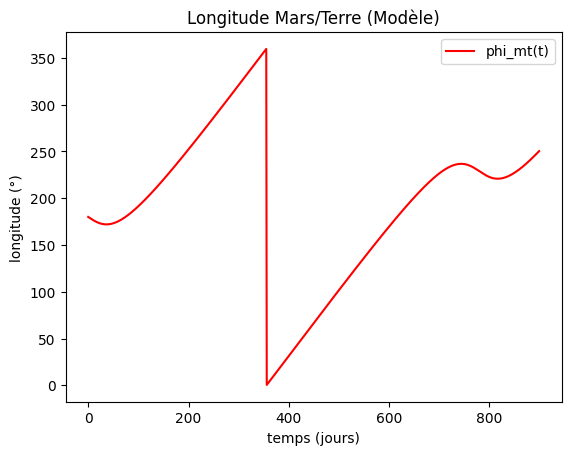

In [5]:
#Transformation de Galilée
x_mt= x_ms(time)-x_ts(time) # en UA
y_mt= y_ms(time)-y_ts(time) # en UA
O_mt =(O_Mars-O_Terre) # en rad/j

# Calcul de la longitude de Mars par rapport à la Terre en fonction du temps
phi_mt =(np.arctan2(y_mt,x_mt))*(180/np.pi) #En degrees


# Modulation de phi_app
modulo=[]
for i in phi_mt:
    modulo.append(i//360)

modulo=np.array(modulo)
phi_mt=phi_mt-(modulo*360)

# Representation des données
plt.plot(time,phi_mt,'r-',label="phi_mt(t)")
plt.title("Longitude Mars/Terre (Modèle)")
plt.xlabel("temps (jours)");plt.ylabel("longitude (°)")
plt.legend()
plt.show()

## 3. Ajustement du modèle

### Première comparaison Modèle/Données  
On répresente le modèle et les données pour les comparer et analyser les possibles ajustements nécéssaires:

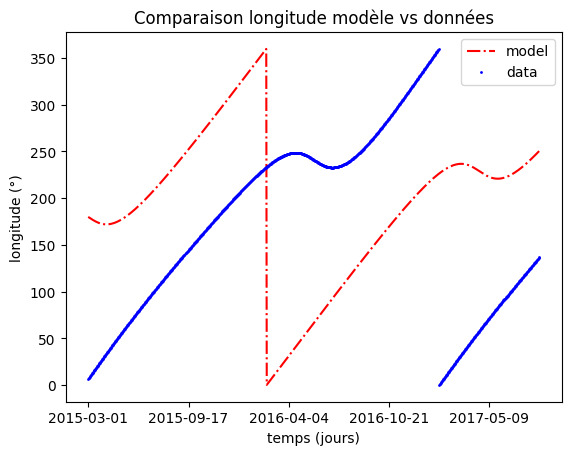

In [6]:
plt.plot(time,phi_mt,'r-.', label="model")
plt.plot(df_DataMars["Date"][:],df_DataMars["Longitude (decimal)"][:],'bo', label="data", markersize=1)
plt.xticks(df_DataMars["Date"][::200])
plt.title("Comparaison longitude modèle vs données")
plt.xlabel("temps (jours)");plt.ylabel("longitude (°)")
plt.legend()
plt.show()

### Ajustement du modèle aux données
On remarque un décalage temporel entre le modèle et les données. On cherchera à le régler en fixant les paramètres libres de notre modèle.  

>Rappel:
>Le mouvement rétrograde apparent s'observe quand, dans le réferentiel héliocentrique, la Terre "dépasse" Mars. Au "milieu" du mouvement rétrograde la Terre et Mars sont donc dans la même direction par rapport au Soleil (Soleil, Terre et Mars sont alignés). En choisissant judiciseusement la date $t=0$ et la phase à l'origine pour les deux planètes, on peut faire coïncider le modèle aux données à cet instant. 

A priori, on a laissé "indéterminés" la phase initiale de Mars et de la Terre par rapport au Soleil et la longitude initiale de Mars par rapport à la Terre à la date 01/03/2015. On se servira des données données dans le fichier `DataMars.csv` et les indices de l'énoncé du mini projet pour fixer la longitude intiale Mars/Terre $\phi_{app0}$.

Selon l'énoncé, l'alignement Soleil-Terre-Mars se produit à la date d'iobservation du mouvement rétrograde: 

>Le centre de la boucle peut s'observer à la date du 25 mai 2016, à la longitude de 240.5°.  

C'est donc cette date qu'on va prendre comme t=0. La valeur de la longitude de Mars/Terre vaut ici: $\phi_{M/T}(0)=240.5°$ . 

Néanmoins on ne peut pas déterminer directement la phase initiale de Mars et la Terre, on essayera de l'ajuster manuellement.

On ajuste la phase initial de Mars et de la Terre 

In [7]:
phi= 240.5*(np.pi/180) #en rad

On calcule le décalage temporel entre la date initiale et la date de l'alignement. D'après  `DataMars.csv`:
- date initiale: *2015-03-01*
- date de l'alignement: *2016-05-25*

In [8]:
t_0=2015*365+3*30+1 #date initiale en jours
t_1=2016*365+5*30+25 #date de l'alignement en jours

delta_t= t_1+1-(t_0)  #différence de temps entre le jour initial et le jour de l'alignement

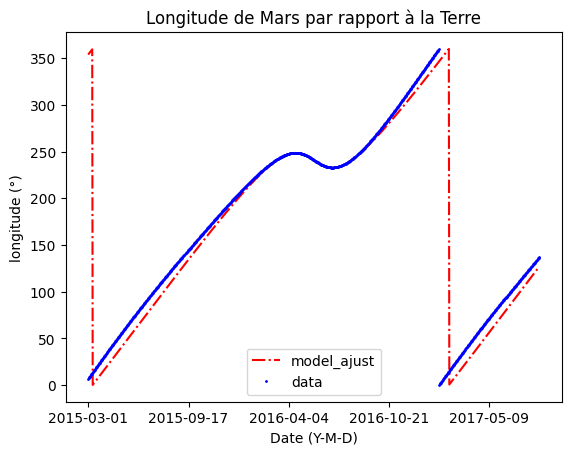

In [11]:
time=np.arange(0,900,1)

# On applique la transformation de Galilée avec le décalage de temps
x_mt= x_ms(time-delta_t)-x_ts(time-delta_t) # en UA
y_mt= y_ms(time-delta_t)-y_ts(time-delta_t) # en UA

# Calcul de la nouvelle longitude de Mars par rapport à la Terre en fonction du temps
phi_mt =(np.arctan2(y_mt,x_mt))*(180/np.pi) #En degrees


# Modulation de phi_app
modulo=[]
for i in phi_mt:
    modulo.append(i//360)

modulo=np.array(modulo)
phi_mt=phi_mt-(modulo*360)


# Représentation des données
plt.plot(time,phi_mt,'r-.',label="model_ajust", linewidth=1.5)
plt.plot(df_DataMars["Date"][:],df_DataMars["Longitude (decimal)"][:],'bo',label="data",markersize=1)
plt.xticks(df_DataMars["Date"][::200])
plt.title("Longitude de Mars par rapport à la Terre")
plt.xlabel("Date (Y-M-D)");plt.ylabel("longitude (°)")
plt.legend()
plt.show()


On sélectionne la partie du graphe représentant le mouvement retrograde, pour bien étudier l'effet de l'ajustement du modèle:

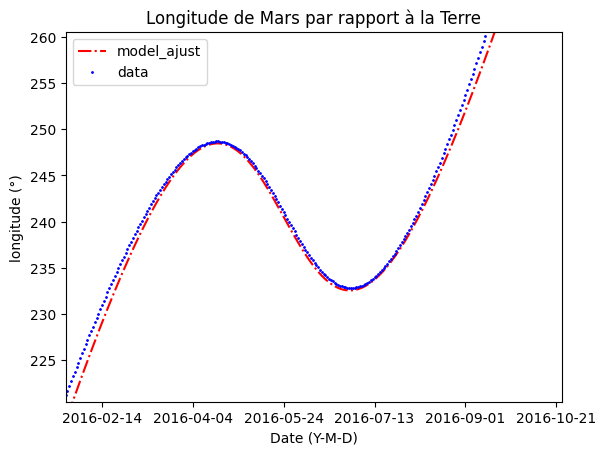

In [13]:
plt.plot(time,phi_mt,'r-.',label="model_ajust")
plt.plot(df_DataMars["Date"][:],df_DataMars["Longitude (decimal)"][:],'bo',label="data", markersize=1)
plt.xticks(df_DataMars["Date"][::50])
plt.ylim(240.5-20,240.5+20);plt.xlim("2016-01-25","2016-10-24")
plt.title("Longitude de Mars par rapport à la Terre")
plt.xlabel("Date (Y-M-D)");plt.ylabel("longitude (°)")
plt.legend()
plt.show()